In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [121]:
bank_data = pd.read_csv('/content/drive/My Drive/Datasets/Bank_Personal_Loan_Modelling-1.csv')

# checking the shape for the bank dataset
bank_data.shape

(5000, 14)

In [122]:
# Checking top 5 and last 5 entries of datset
bank_data.iloc[np.r_[0:5,-5:0]]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [123]:
# understanding the attributes and there entries
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [124]:
# summary statistics
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Following are some basic insights for the above:
- ID column is not that relevant as it use as somewhat simlar to index
- there are some negative values in experience which we need to deal and make it meaningful so that our algorithm is not effected.
- Age of people having accounts is mainly between 35 to 55 with an average of 45.
- Mortgage might have outliers.
- For our target variable i.e., Personal Loan, data for person getting loan is very less which makes the dataset to have more number of negative results. I mean to say this type of skewed data can create Bias algorithm.

In [125]:
# checking null or na values in the dataset
bank_data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [126]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No null values observed

In [0]:
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

In [0]:
# checking the unique values of every column to get a some idea of distribution of dataset
def get_Unique_Values_For_Dataframe_Columns(input_df):
  for column_name in input_df.columns:
    print('\nColumn name: ', column_name)
    if(input_df[column_name].nunique() < 60):
      print('Unique values: ',input_df[column_name].unique())
    else:
      print('Total number of unique values: ', input_df[column_name].nunique())

In [129]:
get_Unique_Values_For_Dataframe_Columns(bank_data)  


Column name:  ID
Total number of unique values:  5000

Column name:  Age
Unique values:  [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Column name:  Experience
Unique values:  [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Column name:  Income
Total number of unique values:  162

Column name:  ZIP Code
Total number of unique values:  467

Column name:  Family
Unique values:  [4 3 1 2]

Column name:  CCAvg
Total number of unique values:  108

Column name:  Education
Unique values:  [1 2 3]

Column name:  Mortgage
Total number of unique values:  347

Column name:  Personal Loan
Unique values:  [0 1]

Column name:  Securities Account
Unique values:  [1 0]

Column name:  CD Account
Unique values:  [0 1]

Column name:  Online
Unique values:  [0 1]

Column name:  CreditCard
Unique values:  [0 1]


- Clearly ID is not useful as it only a work as index

In [0]:
# droping the ID column
modified_bank_data = bank_data.drop('ID', axis=1, inplace=False)

**Now univariate analysis**

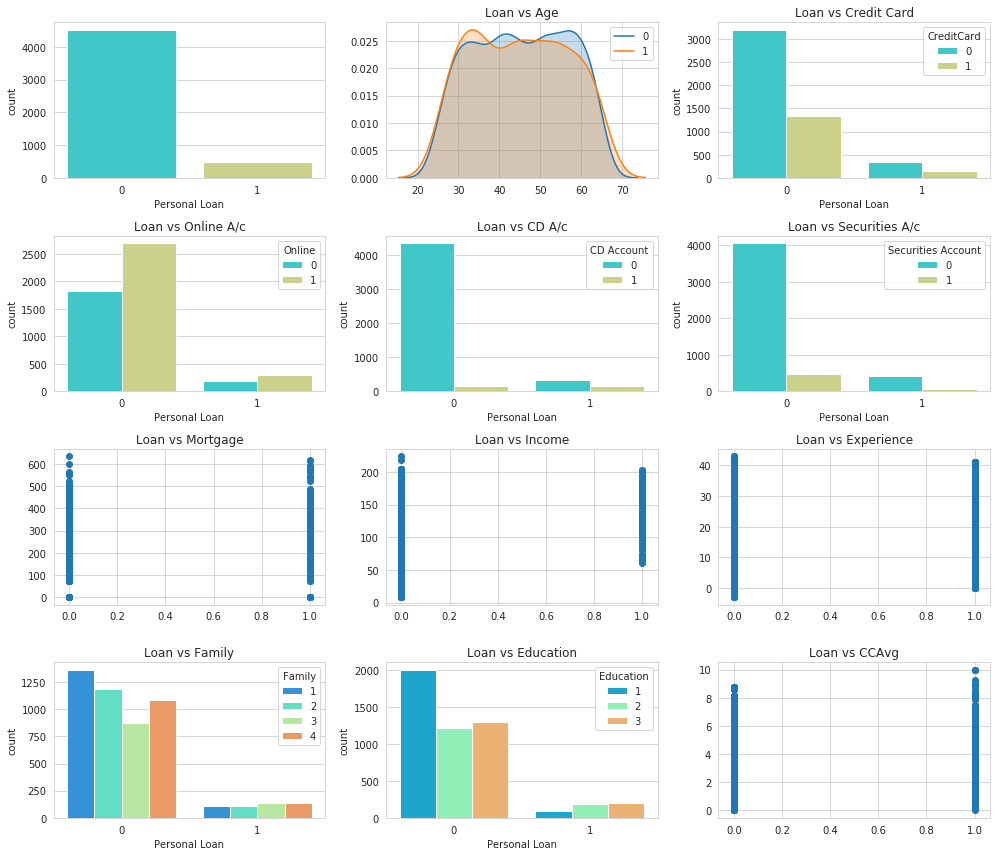

In [131]:
fig = plt.figure(figsize=(14,12))
sns.set_style('whitegrid')
plt.subplot2grid((4,3),(0,0))
sns.countplot(x='Personal Loan',data=bank_data,palette='rainbow')

plt.subplot2grid((4,3),(0,1))
plt.title("Loan vs Age")
#plt.scatter(bank_data['Personal Loan'],bank_data.Age, alpha=0.5) # Loan vs Age
sns.kdeplot(bank_data[bank_data['Personal Loan'] == 0]['Age'], shade=True, label='0')
sns.kdeplot(bank_data[bank_data['Personal Loan'] == 1]['Age'], shade=True, label='1')

plt.subplot2grid((4,3),(0,2))
plt.title("Loan vs Credit Card")
sns.countplot(x='Personal Loan',hue='CreditCard',data=bank_data,palette='rainbow')

plt.subplot2grid((4,3),(1,0))
plt.title("Loan vs Online A/c")
sns.countplot(x='Personal Loan',hue='Online',data=bank_data,palette='rainbow')

plt.subplot2grid((4,3),(1,1))
plt.title("Loan vs CD A/c")
sns.countplot(x='Personal Loan',hue='CD Account',data=bank_data,palette='rainbow')

plt.subplot2grid((4,3),(1,2))
plt.title("Loan vs Securities A/c")
sns.countplot(x='Personal Loan',hue='Securities Account',data=bank_data,palette='rainbow')


plt.subplot2grid((4,3),(2,0))
plt.title("Loan vs Mortgage")
plt.scatter(bank_data['Personal Loan'],bank_data.Mortgage) # Loan vs Mortgage


plt.subplot2grid((4,3),(2,1))
plt.title("Loan vs Income")
plt.scatter(bank_data['Personal Loan'],bank_data.Income) # Loan vs Income

plt.subplot2grid((4,3),(2,2))
plt.title("Loan vs Experience")
plt.scatter(bank_data['Personal Loan'],bank_data.Experience) # Loan vs Experience

plt.subplot2grid((4,3),(3,0))
plt.title("Loan vs Family")
sns.countplot(x ='Personal Loan', hue ='Family', data = bank_data, palette ='rainbow')  # Loan vs Family

plt.subplot2grid((4,3),(3,1))
plt.title("Loan vs Education")
sns.countplot(x ='Personal Loan', hue ='Education', data = bank_data, palette ='rainbow') # Loan vs Education

plt.subplot2grid((4,3),(3,2))
plt.title("Loan vs CCAvg")
plt.scatter(bank_data['Personal Loan'],bank_data.CCAvg) # Loan vs CCAvg

plt.tight_layout()


observations from the countplot and scatter plots:
- The loan data has imbalance
- Majority Loan takers are having online account
- Loan takers fall in the middle to high income range
- Majority of the non-loan takers were from class 1 in Education

Now pair plots

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


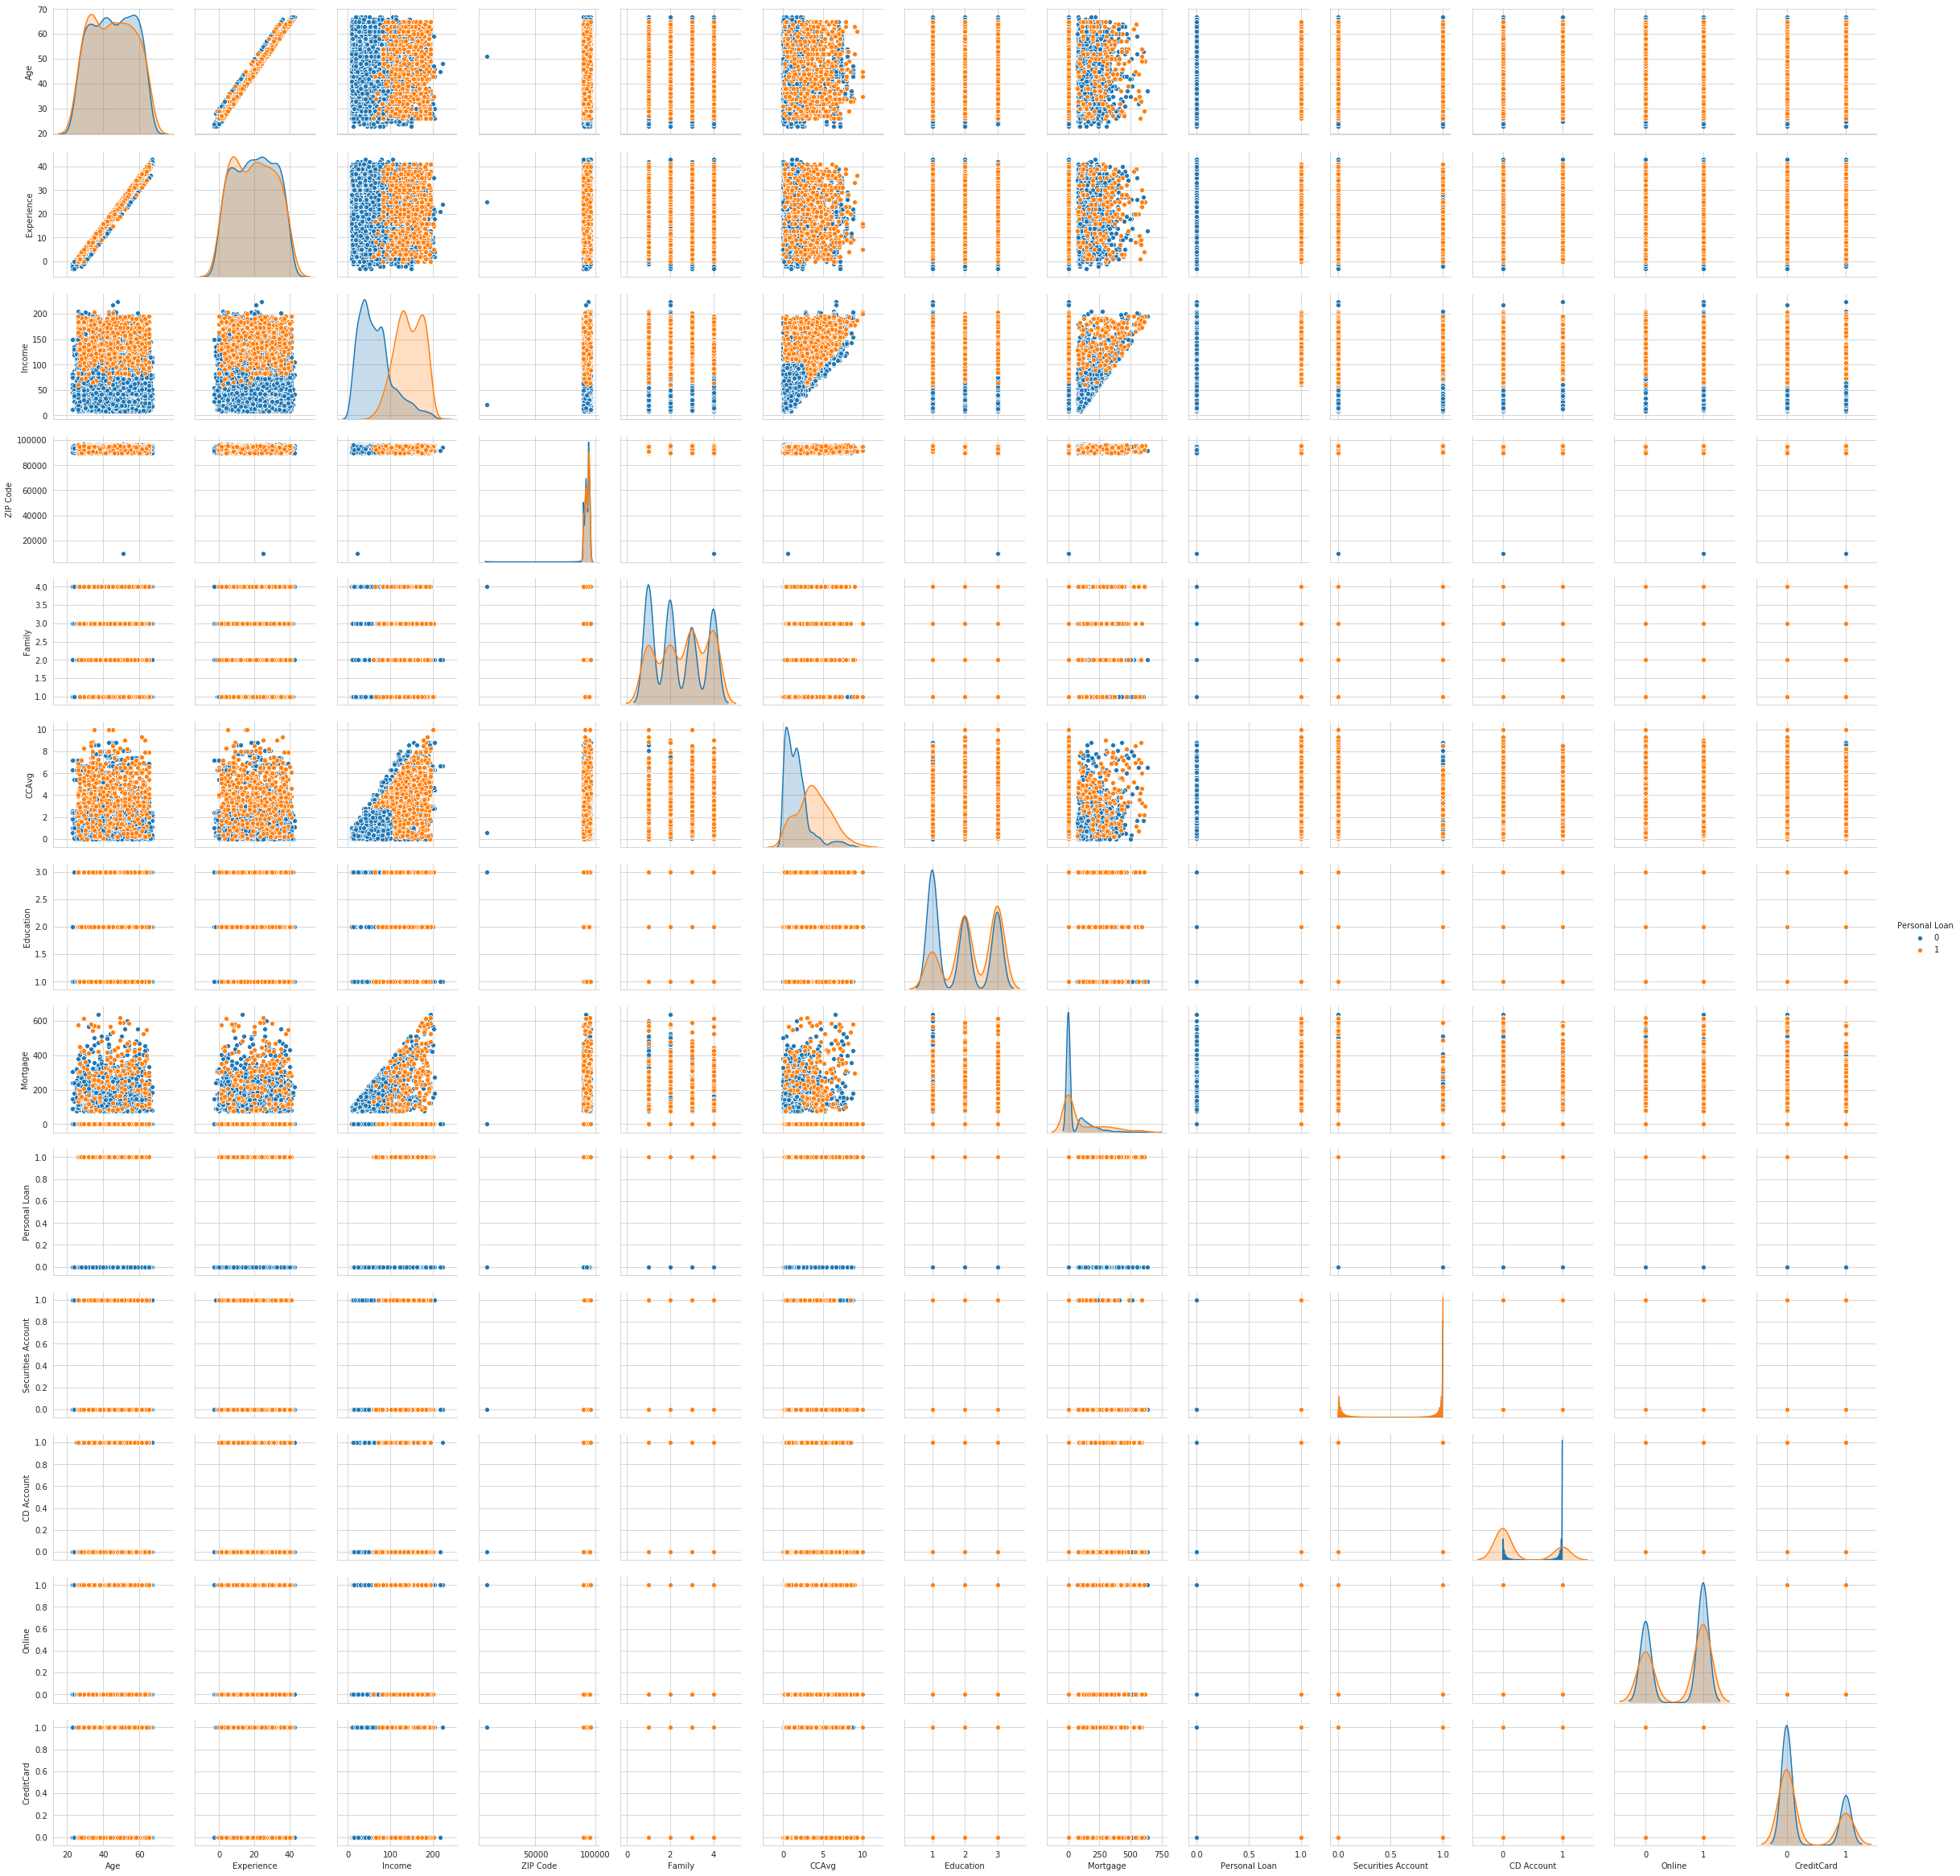

In [132]:
sns.pairplot(modified_bank_data, hue='Personal Loan')

Some insights from pairplot:

- Zip code is not giving any good interpretation of the personal loan.
- The pairplots show a mixed data where the personal loan classes overlap
- The plots are not very correlated as well, cause most of the plots show random distibution of points rather than a positive or negative slope.
- Income can be a good 

In [0]:
modified_bank_data.drop('ZIP Code', axis=1,inplace = True)

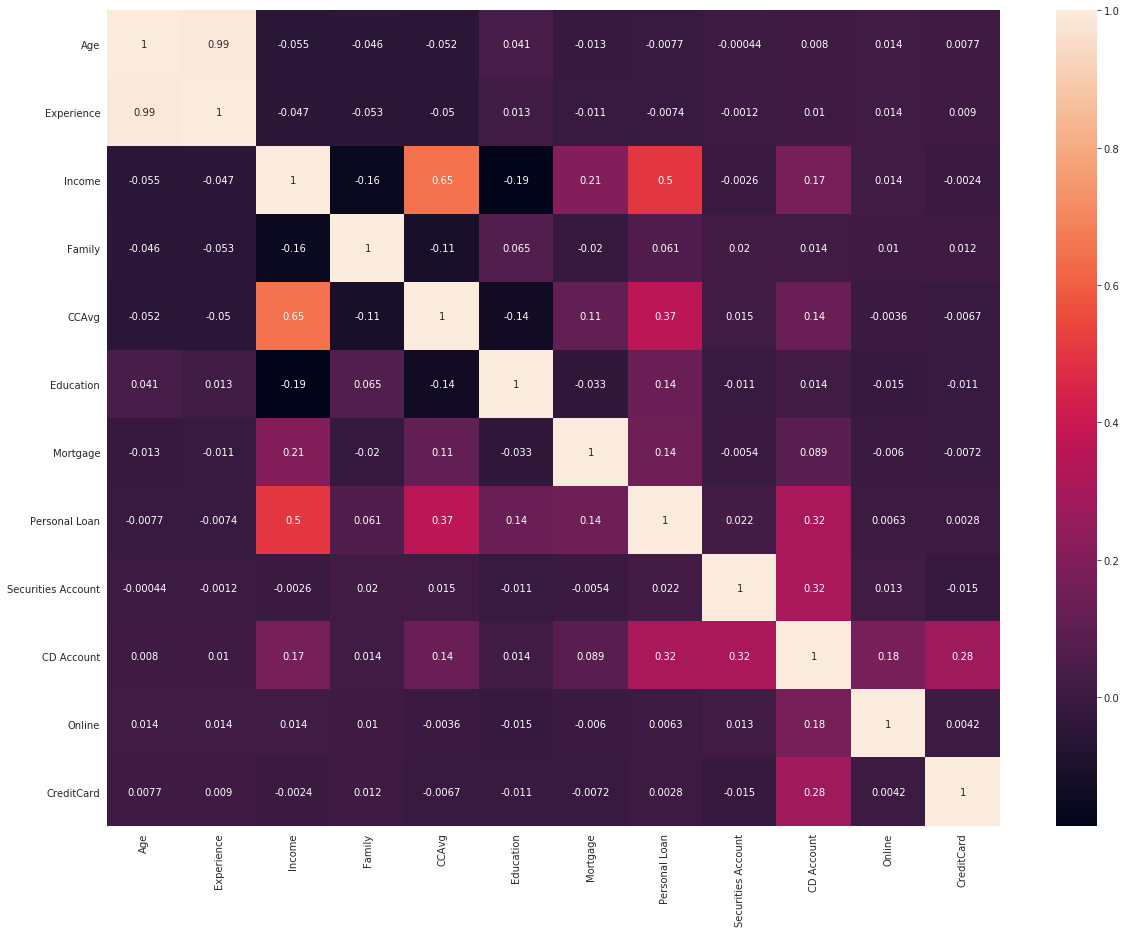

In [134]:
# checking the corrleation using heat map
plt.figure(figsize=(20, 15))
sns.heatmap(modified_bank_data.corr(), annot=True);

observations based on collinearity
- Age and experience are highly correlated
- Income is one of the major factors that influences getting a loan.
- Important features can be 'Income', 'Family', 'Education', 'CD Account', 'CreditCard'.

In [0]:
# Feature Engineering

# Feature and target
X = modified_bank_data[['Age','Experience','Income','Family','CCAvg','Education','Securities Account','Mortgage','CD Account','Online','CreditCard']]
Y = modified_bank_data['Personal Loan']

In [0]:
# libraries
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn import metrics
from scipy import stats
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import mlxtend
import timeit
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (3500, 11) (3500,)
Testing dataset shape: (1500, 11) (1500,)


In [0]:
# 
logr = LogisticRegressionCV()
# Build step forward feature selection
sfs1 = sfs(logr, k_features=6, forward=True, scoring='accuracy', cv=5)
sfs1 = sfs1.fit(x_train, y_train)

In [139]:
results = sfs1.get_metric_dict()
pd.DataFrame(results).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.909712,0.00777186,"[0.920114122681883, 0.9042857142857142, 0.9071...","(2,)","(Income,)",0.00604677,0.00302338
2,0.942857,0.00615062,"[0.9472182596291013, 0.9357142857142857, 0.947...","(2, 5)","(Income, Education)",0.00478539,0.0023927
3,0.945427,0.0055215,"[0.9500713266761769, 0.9385714285714286, 0.95,...","(2, 5, 8)","(Income, Education, CD Account)",0.00429591,0.00214796
4,0.948571,0.00309419,"[0.9514978601997147, 0.9442857142857143, 0.948...","(2, 5, 8, 10)","(Income, Education, CD Account, CreditCard)",0.00240739,0.00120369
5,0.952001,0.00563258,"[0.9557774607703281, 0.9485714285714286, 0.947...","(2, 3, 5, 8, 10)","(Income, Family, Education, CD Account, Credit...",0.00438234,0.00219117
6,0.953142,0.00218496,"[0.9557774607703281, 0.9528571428571428, 0.954...","(2, 3, 5, 8, 9, 10)","(Income, Family, Education, CD Account, Online...",0.00169997,0.000849985


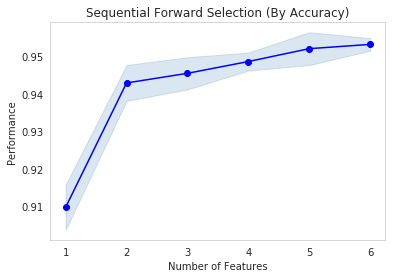

In [140]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (By Accuracy)')
plt.grid()
plt.show()

 Features that are most important are as follows :
 - Income
 - Family
 - Education
 - CD Account
 - CreditCard

In [0]:
X = modified_bank_data[['Income','Family','Education','CD Account','CreditCard']]
Y = modified_bank_data['Personal Loan']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5, stratify = modified_bank_data['Personal Loan'].values )

**Model Creation**

KNN

In [0]:
X_train_z = X_train.apply(zscore)
X_test_z = X_test.apply(zscore)


The optimal number of neighbors is 5.
the misclassification error for each k value is :  [0.027 0.026 0.024 0.025 0.025 0.026 0.03  0.029 0.031 0.031]


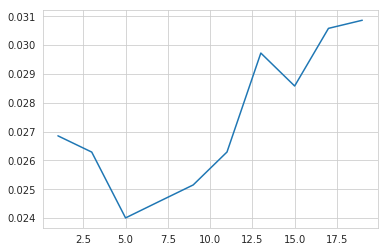

In [145]:
#specifically for KNN we can do k-fold cross validation
# creating odd list of K for KNN
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric = 'euclidean')
    scores = cross_val_score(knn, X_train_z, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [146]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance', metric='euclidean')
%timeit NNH.fit(X_train_z,Y_train)
test_prediction = NNH.predict(X_test_z)
test_prediction

100 loops, best of 3: 5.9 ms per loop


array([0, 0, 0, ..., 0, 0, 0])

In [147]:
#get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

print(metrics.classification_report(Y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.92      0.85      0.88       144

    accuracy                           0.98      1500
   macro avg       0.95      0.92      0.93      1500
weighted avg       0.98      0.98      0.98      1500



In [148]:
#confusion matrix
print(metrics.confusion_matrix(Y_test, test_prediction))

[[1345   11]
 [  22  122]]


Naive Bayes

In [0]:
#adding only numerical variables for Gaussian NB
X_train_gnb = X_train.loc[:,['Income']]

In [150]:
clf = GaussianNB()  
clf.fit(X_train_gnb, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
predict_numeric = clf.predict_proba(X_train_gnb)
predict_numeric

array([[9.89161794e-01, 1.08382063e-02],
       [9.95870312e-01, 4.12968830e-03],
       [7.92833844e-01, 2.07166156e-01],
       ...,
       [2.77473021e-01, 7.22526979e-01],
       [9.99698164e-01, 3.01835535e-04],
       [1.52690526e-01, 8.47309474e-01]])

In [0]:
#taking all categorical variables as multinomial NB
X_train_mnb = X_train.loc[:,['Family','Education','CD Account','CreditCard']]

In [153]:
clf_mnb = MultinomialNB()
%timeit clf_mnb.fit(X_train_mnb, Y_train)

1000 loops, best of 3: 1.45 ms per loop


In [154]:
#predict categorical gives the probability of categorical features with respect to class 0 and class 1 of personal loan.
predict_categorical = clf_mnb.predict_proba(X_train_mnb)
predict_categorical

array([[0.92157113, 0.07842887],
       [0.92692562, 0.07307438],
       [0.91610975, 0.08389025],
       ...,
       [0.91610975, 0.08389025],
       [0.92434749, 0.07565251],
       [0.9242339 , 0.0757661 ]])

In [155]:
#since naive bayes involves multiplying the likelihood probabilities, I have multiplied the probabilities for the two sets of features categorical and numerical
all_features_proba = predict_numeric * predict_categorical

all_features_proba

array([[9.11582955e-01, 8.50028244e-04],
       [9.23097704e-01, 3.01774422e-04],
       [7.26322812e-01, 1.73792215e-02],
       ...,
       [2.54195739e-01, 6.06129719e-02],
       [9.24068485e-01, 2.28346171e-05],
       [1.41121760e-01, 6.41973353e-02]])

In [0]:
#argmax takes the index of the higher probability value in each list inside 2-D array
X_train_predict = []
for i in range(len(X_train.index)):
    X_train_predict.append(np.argmax(all_features_proba[i]))

In [157]:
expected = Y_train
predicted = X_train_predict

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3164
           1       0.87      0.10      0.18       336

    accuracy                           0.91      3500
   macro avg       0.89      0.55      0.56      3500
weighted avg       0.91      0.91      0.88      3500

[[3159    5]
 [ 303   33]]


In [0]:
X_test_gnb = X_test.loc[:,['Income']]
predict_test_numeric = clf.predict_proba(X_test_gnb)

In [0]:
X_test_mnb = X_test.loc[:,['Family','Education','CD Account','CreditCard']]
predict_test_categorical = clf_mnb.predict_proba(X_test_mnb)

In [0]:
test_all_features_proba = predict_test_numeric * predict_test_categorical

In [0]:
X_test_predict = []
for i in range(len(X_test.index)):
    X_test_predict.append(np.argmax(test_all_features_proba[i]))

In [0]:
expected = Y_test
predicted = X_test_predict

In [163]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.96      0.15      0.26       144

    accuracy                           0.92      1500
   macro avg       0.94      0.58      0.61      1500
weighted avg       0.92      0.92      0.89      1500



In [164]:
print(metrics.confusion_matrix(expected, predicted))

[[1355    1]
 [ 122   22]]


Logistic Regression

In [0]:
from sklearn.model_selection import GridSearchCV

#Logistic regression takes care of outliers by usage of sigmoid function which doesn't let the points 
#having a larger distance from the 'w' plane to go to a value higher than a given threshold.

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]



#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train_z, Y_train);

In [166]:
print(model.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
print(model.score(X_train_z, Y_train))

In [0]:
%timeit model.score(X_test_z, Y_test)

In [0]:

#C = 100 implies lambda = 0.01, so the hyper parameter for which the score is the highest is 0.01.
predicted  = model.predict(X_test_z)
expected = Y_test

In [167]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.96      0.15      0.26       144

    accuracy                           0.92      1500
   macro avg       0.94      0.58      0.61      1500
weighted avg       0.92      0.92      0.89      1500



In [168]:
print(metrics.confusion_matrix(expected, predicted))

[[1355    1]
 [ 122   22]]


The best model based on accuracy is KNN But to evaluate the algorithm based on time complexity :

The time taken by KNN goes in milliseconds whereas for naive bayes and logistic regression is way lesser. Considering time and space complexity the favorable algrorithm is Logistic regression whereas considering accuracy KNN is better

Accuracy of models comparison :

- Naive bayes works best on catgorical and text classification. Since this dataset also had numerical data, the performance for naive bayes was a little lower. Naive bayes also assumes independence of the features and in real workd that might not be true.
- Logistic regression is a very good model for a two class classification problem, but the underlying assumption that it uses is the data is linearly separable. But it might not always be the case. However it performs better than naive bayes for this data.
- KNN uses neighbourhood concept without much prerequisites. This helps KNN to give better results compared to other algorithms.